In [2]:
from droplet_growth import register, mic, poisson, fit

from droplet_growth import multiwell as mw
from glob import glob
import tifffile as tf
import matplotlib.pyplot as plt
import numpy as np
from functools import partial, reduce
from operator import add
import pandas as pd
import re
from multiprocessing import Pool
import os
import seaborn as sns

from scipy import ndimage as ndi
%load_ext autoreload
%autoreload 2

In [2]:
!pwd

/pasteur/sonic/homes/aaristov/nd2shrink


In [3]:
template16_path = "/home/aaristov/Anchor/Lena/Data/20210518_control/template_bin16_bf_mask.tif"
# labels2 = tf.imread('/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/labels_bin2.tif')
big_labels = tf.imread('/home/aaristov/Anchor/Lena/Data/labels_bin2+100.tif')


template16, mask16 = tf.imread(template16_path)

align = partial(register.align_stack, template16=template16, mask2=big_labels, binnings=(2,16,2), plot=False, suffix='.aligned-big-labels.tif')

In [48]:
paths = glob('/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/*ng-Composite.tif')
paths

['/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/00ng-Composite.tif',
 '/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/10ng-Composite.tif',
 '/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/04ng-Composite.tif',
 '/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/02ng-Composite.tif',
 '/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/8ng-Composite.tif',
 '/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/06ng-Composite.tif']

In [55]:
align('/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/00ng-Composite.tif')

/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/00ng-Composite.tif (2, 7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/00ng-Composite.tif {'tvec': array([  -1.89574421, -231.17330943]), 'success': 0.047504092665700465, 'angle': -3.118760565331911, 'scale': 0.9956689458496376, 'Dscale': 0.0004746965370335399, 'Dangle': 0.013477088948787063, 'Dt': 0.25, 'timg': None}
input (7019, 22259)
input (7019, 22259)
Saved aligned stack /home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/00ng-Composite.aligned-big-labels.tif


array([[[15672, 15741, 15706, ..., 15581, 15581, 15581],
        [15748, 15817, 15842, ..., 15581, 15581, 15581],
        [15730, 15768, 15892, ..., 15581, 15581, 15581],
        ...,
        [15580, 15580, 15580, ..., 16848, 16830, 16743],
        [15580, 15580, 15580, ..., 16830, 16708, 16649],
        [15580, 15580, 15580, ..., 16765, 16599, 16564]],

       [[  418,   416,   414, ...,   415,   415,   415],
        [  415,   416,   416, ...,   415,   415,   415],
        [  415,   416,   417, ...,   415,   415,   415],
        ...,
        [  415,   415,   415, ...,   416,   415,   415],
        [  415,   415,   415, ...,   417,   418,   419],
        [  415,   415,   415, ...,   415,   418,   418]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,    

In [49]:
p = Pool(6)
aligned0h = p.map(align, paths)
p.close()

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/00ng-Composite.tif (2, 7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/04ng-Composite.tif (2, 7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/02ng-Composite.tif (2, 7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/10ng-Composite.tif (2, 7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/8ng-Composite.tif (2, 7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/06ng-Composite.tif (2, 7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/00ng-Composite.tif {'tvec': array([ 85.05219143, 287.70193542]), 'success': 0.04041379043734151, 'angle': -3.118814816747232, 'scale': 0.9956529979400839, 'Dscale': 0.0004746889336855901, 'Dangle': 0.013477088948787063, 'Dt': 0.25, 'timg': None}
input (7019, 22259)
/home/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/04ng-Co

In [19]:
def get_concentration(path, regex='(\d+)ng-Composite.tif'):
    try:
        ng = re.compile(regex).findall(path)[0]
        print (int(ng))
        return int(ng)
    except IndexError:
        print('concentration not found')
        
def align_n_count_mic(path, regex='(\d+)ng-Composite.tif', fun=align):
    # get concentration
    c = get_concentration(path, regex=regex)
    # align
    if not os.path.exists(apath := path.replace('.tif', '.aligned-labels.tif')):
        _, fluo_aligned, mask_aligned = align(path)
    else:
        print(f'{c} ng already aligned')
        _, fluo_aligned, mask_aligned = tf.imread(apath)
    # count
    counts = mic.get_cell_numbers(
        fluo_aligned, 
        mask_aligned, 
        threshold_abs=2,
        plot=False,
        meta={'ng': c}
    )
    poisson.fit(counts.query('n_cells < 10').n_cells, title=f'{c} ng')
    # return table
    return counts
    

In [20]:
list(map(get_concentration, paths))

0
10
4
2
8
6


[0, 10, 4, 2, 8, 6]

6082



10
4


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/06ng-Composite.tif (2, 7019, 22259)
/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/10ng-Composite.tif (2, 7019, 22259)
/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/8ng-Composite.tif (2, 7019, 22259)
/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/04ng-Composite.tif (2, 7019, 22259)
/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/00ng-Composite.tif/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/02ng-Composite.tif  (2, 7019, 22259)(2, 7019, 22259)

{'tvec': array([  53.74086083, -214.07812417]), 'success': 0.04836486821624185, 'angle': -1.6890494088721937, 'scale': 0.9957894749736077, 'Dscale': 0.0004747540006694188, 'Dangle': 0.013477088948787063, 'Dt': 0.25, 'timg': None}
input (7019, 22259)
{'tvec': array([141.39899875, 308.66786985]), 'success': 0.04667737625224914, 'angle': 2.9359200012143845, 'scale': 0.995989455

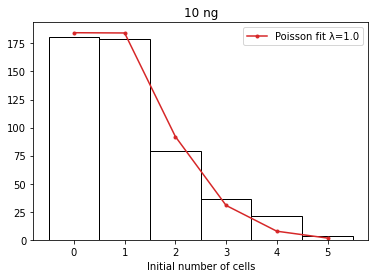

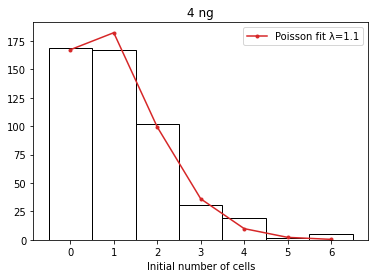

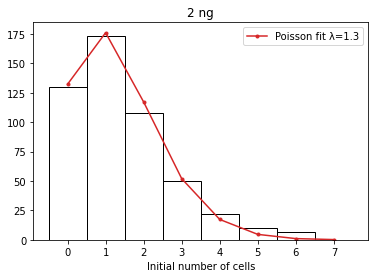

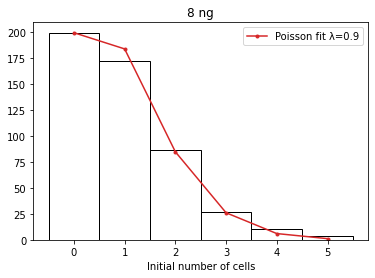

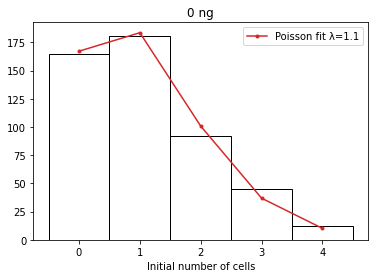

In [21]:
p = Pool(6)

In [ ]:
counts = p.map(align_n_count_mic, paths)

In [ ]:
p.close()

In [44]:
for p, c in zip(paths, counts):
    c.to_csv(p.replace('.tif', '-counts.csv'))

In [10]:
counts = pd.concat([pd.read_csv(a) for a in glob('/pasteur/sonic/homes/aaristov/Anchor/Lena/Data/20210622-MIC-load-5x/composites/*ng-Composite.aligned-counts.csv')], ignore_index=True)

In [11]:
counts

label            x             y  n_cells  ng  poisson fit
0         1   663.248626    417.128241        2   4     1.318794
1         2   664.647675    948.961450        1   4     1.318794
2         3   665.043884   1475.729516        1   4     1.318794
3         4   661.226322  16298.040220        2   4     1.318794
4         5   660.757642  16826.050217        0   4     1.318794
...     ...          ...           ...      ...  ..          ...
3001    497  5962.000000   4646.000000        1   8     1.091405
3002    498  5961.897296   5177.702880        2   8     1.091405
3003    499  5961.526499   5706.998255        2   8     1.091405
3004    500  5961.537016   6236.971642        0   8     1.091405
3005    501  5961.585169   6765.801022        2   8     1.091405

[3006 rows x 6 columns]

# Align 24h

In [ ]:
paths24 = glob('/home/aaristov/Anchor/Lena/Data/20210623-MIC-24h-5x/Composites/*ng-Composite.tif')
paths24

In [ ]:
p = Pool(6)
aligned24 = p.map(align, paths24)

In [25]:
p.close()

In [3]:
alighend_paths24 = glob('/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/*ng-Composite.aligned.tif')
alighend_paths24

['/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/00ng-Composite.aligned.tif',
 '/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/08ng-Composite.aligned.tif',
 '/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/06ng-Composite.aligned.tif',
 '/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/10ng-Composite.aligned.tif',
 '/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/02ng-Composite.aligned.tif',
 '/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/04ng-Composite.aligned.tif']

In [4]:
get_intensities = partial(mic.get_intensities, save_suffix='intensities')

In [ ]:
p = Pool(6)
intensities = p.map(get_intensities, alighend_paths24)

In [6]:
p.close()

In [7]:
intensities = pd.concat(intensities)
intensities

label  mean_intensity  max_intensity  ng
0        1      459.714783           1265   0
1        2      505.158112           4063   0
2        3      413.960510            447   0
3        4      413.739563            443   0
4        5      510.123810           3818   0
..     ...             ...            ...  ..
496    497      467.273407           3924   4
497    498      414.424652            435   4
498    499      414.613800            603   4
499    500      414.494934            435   4
500    501      440.297974           1616   4

[3006 rows x 4 columns]

In [9]:
intensities.to_csv('/pasteur/sonic/homes/aaristov/appascratch/20210623-MIC-24h-5x/Composites/intensities.csv')

In [89]:
path_table = '/home/aaristov/Anchor/Lena/Data/20210623-MIC-24h-5x/table-upd.csv'
table = pd.read_csv(path_table)

In [98]:
table

label            x             y  n_cells  ng  poisson fit  \
0         1   663.248626    417.128241        2   0     1.341496   
1         2   664.647675    948.961450        0   0     1.341496   
2         3   665.043884   1475.729516        2   0     1.341496   
3         4   661.226322  16298.040220        0   0     1.341496   
4         5   660.757642  16826.050217        1   0     1.341496   
...     ...          ...           ...      ...  ..          ...   
3001    497  5962.000000   4646.000000        0  10     1.220026   
3002    498  5961.897296   5177.702880        1  10     1.220026   
3003    499  5961.526499   5706.998255        2  10     1.220026   
3004    500  5961.537016   6236.971642        1  10     1.220026   
3005    501  5961.585169   6765.801022        1  10     1.220026   

      mean_intensity  max_intensity  final_state  threshold  
0         438.597748           3843         True        420  
1         413.819519            435        False        420  
2         446.879608           2230         True        420  
3         413.686462            430        False        420  
4         451.158173           2233         True        420  
...              ...            ...          ...        ...  
3001      414.339752            449        False        420  
3002      414.351746            442        False        420  
3003      415.655060            908        False        420  
3004      414.193207           1072        False        420  
3005      415.018555           1286        False        420  

[3006 rows x 10 columns]

In [99]:
def get_mse(dff=table, thr=420):
    dft = mic.show_prob_survive(dff, thr)

    stats = mic.get_stats(dft)

    probs = mic.fit.single_prob(stats)
    
    return probs

computed threshold = 424.3914955004466 from max concentration 10


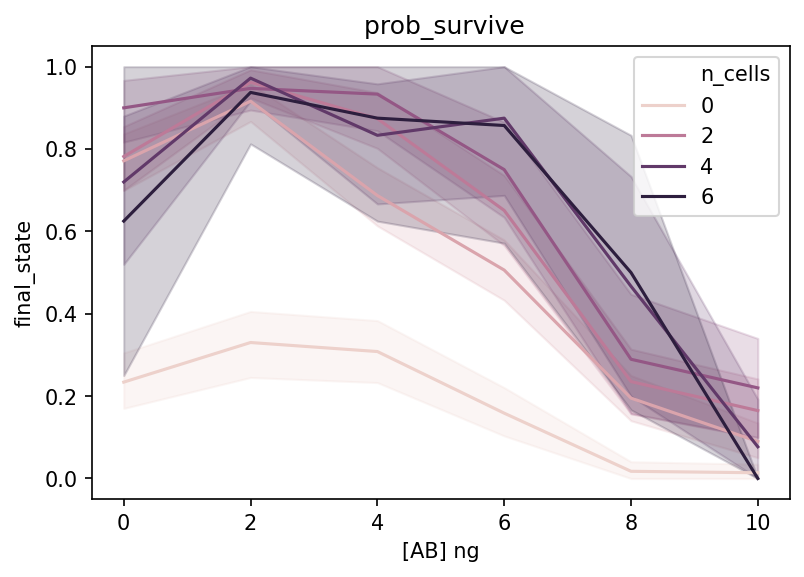

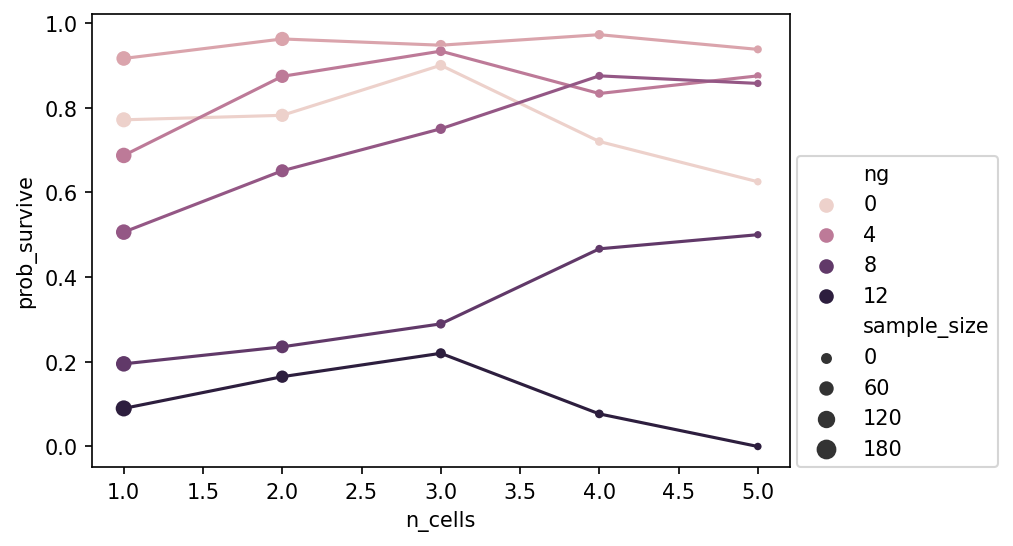

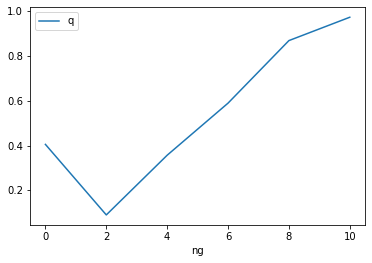

ng  prob_survive         q               precision       MSE
0   0      0.594586  0.405414   [0.17064516498406346]  0.046350
1   2      0.909322  0.090678  [0.044782648812707715]  0.001658
2   4      0.642936  0.357064   [0.07604745058805851]  0.007846
3   6      0.410492  0.589508  [0.030079385812113675]  0.003267
4   8      0.131367  0.868633  [0.009403759803165063]  0.001706
5  10      0.027202  0.972798    [0.0169527367015414]  0.010681

In [108]:
get_mse(thr="auto")

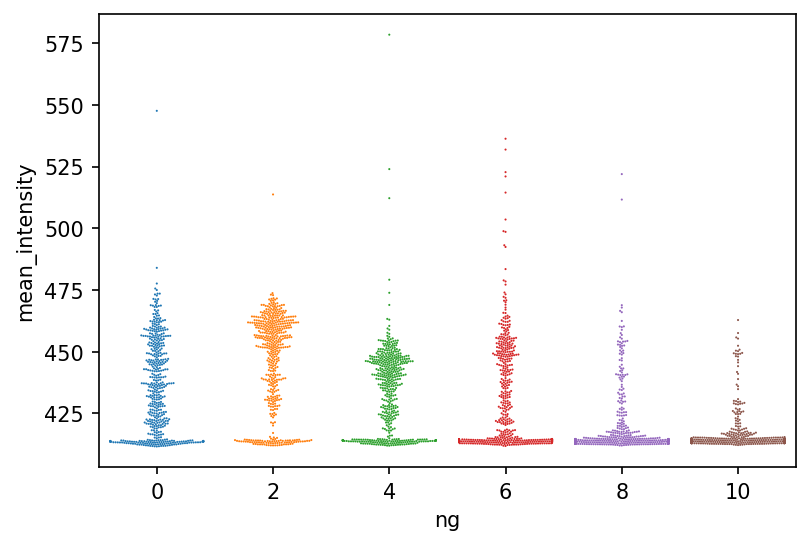

In [59]:
fig, ax = plt.subplots(dpi=150)
sns.swarmplot(ax=ax, data=table, x='ng', y='mean_intensity', size=1)

In [81]:
fig, ax = plt.subplots(dpi=150)
sns.swarmplot(ax=ax, data=table, x='ng', y='max_intensity', size=1)

In [67]:
fig, ax = plt.subplots(dpi=150)
sns.swarmplot(ax=ax, data=table.query('n_cells < 6'), x='ng', y='mean_intensity', hue='n_cells', dodge=True, size=1)
ax.set_title('22-23 june 2021')

Text(0.5, 1.0, '22-23 june 2021')

In [82]:
fig, ax = plt.subplots(dpi=150)
sns.swarmplot(ax=ax, data=table.query('n_cells < 6'), x='ng', y='max_intensity', hue='n_cells', dodge=True, size=1)
ax.set_title('22-23 june 2021')

Text(0.5, 1.0, '22-23 june 2021')

In [91]:
table.loc[:, 'final_state'] = table.mean_intensity > (thr := 420)
table.loc[:, 'threshold'] = thr
table.to_csv(path_table, index=None)

Text(0.5, 1.0, 'Intensity threshold 420')

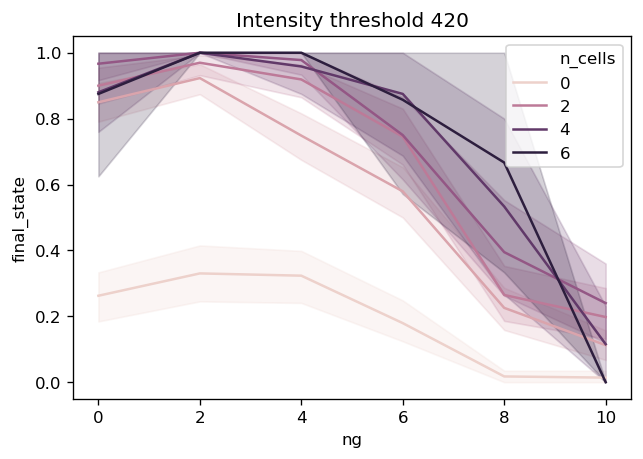

In [93]:
fig, ax = plt.subplots(dpi=120)
sns.lineplot(ax=ax, data=table.query('-1<n_cells < 6'), x='ng', y='final_state', hue='n_cells', )
ax.set_title('Intensity threshold 420')

Text(0.5, 1.0, 'counting threshold 20')

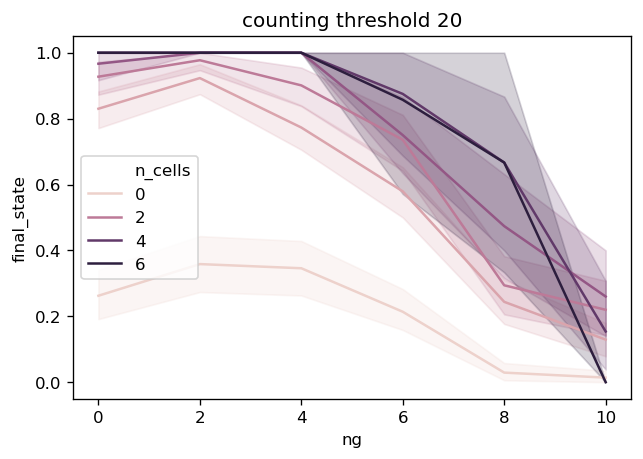

In [110]:
path_ctable = '/home/aaristov/Anchor/Lena/Data/20210623-MIC-24h-5x/table-count24.csv'
ctable = pd.read_csv(path_ctable)


fig, ax = plt.subplots(dpi=120)
sns.lineplot(ax=ax, data=ctable.query('-1<n_cells < 6'), x='ng', y='final_state', hue='n_cells', )
ax.set_title('counting threshold 20')

In [111]:
fig, ax = plt.subplots(dpi=120)
sns.lineplot(ax=ax, data=ctable.query('0 < n_cells < 6'), x='n_cells', y='final_state', hue='ng')
ax.set_title('counting threshold 20')

Text(0.5, 1.0, 'counting threshold 20')

Text(0.5, 1.0, 'intensity threshold 420')

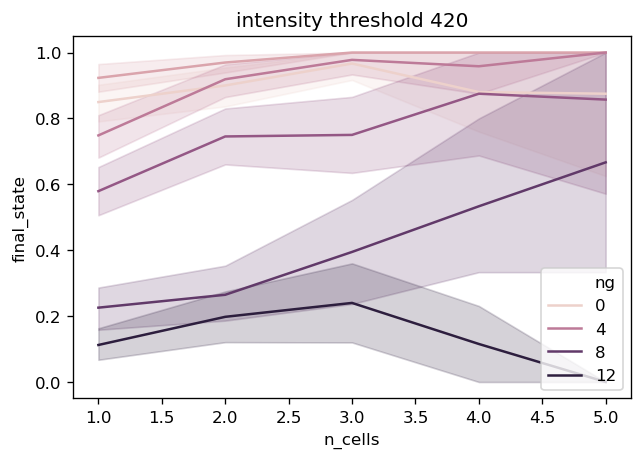

In [97]:
fig, ax = plt.subplots(dpi=120)
sns.lineplot(ax=ax, data=table.query('0 < n_cells < 6'), x='n_cells', y='final_state', hue='ng')
ax.set_title('intensity threshold 420')

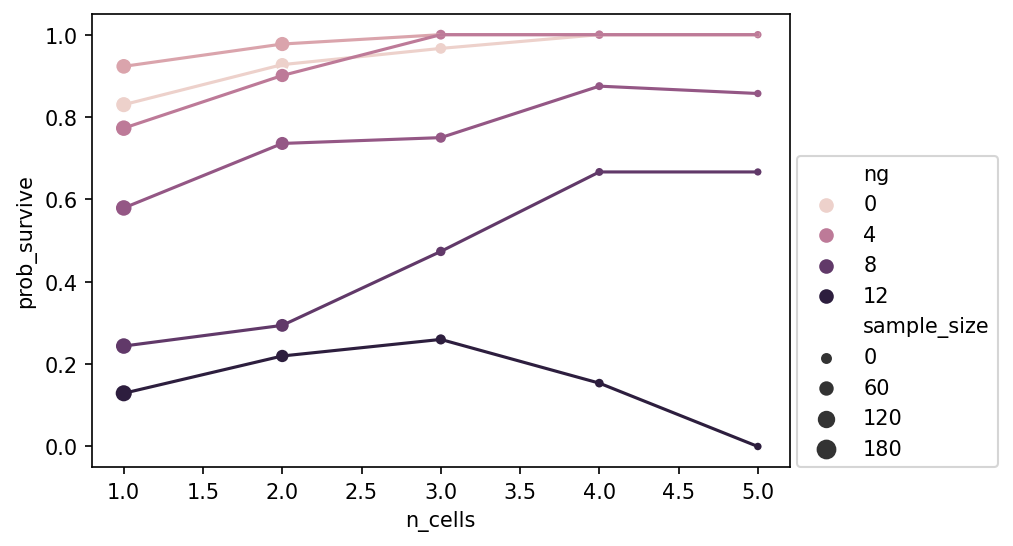

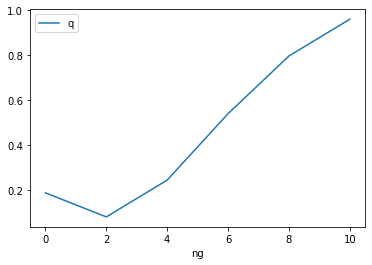

ng  prob_survive         q               precision       MSE
0   0      0.813159  0.186841  [0.023000764996933383]  0.000487
1   2      0.920478  0.079522  [0.008203316932077636]  0.000055
2   4      0.756423  0.243577  [0.020206830194091696]  0.000416
3   6      0.460560  0.539440  [0.049670367322518186]  0.006907
4   8      0.203542  0.796458  [0.014079941406632657]  0.002425
5  10      0.039708  0.960292   [0.02197401999951015]  0.016598

In [114]:

stats = mic.get_stats(ctable)

probs = mic.fit.single_prob(stats)
probs

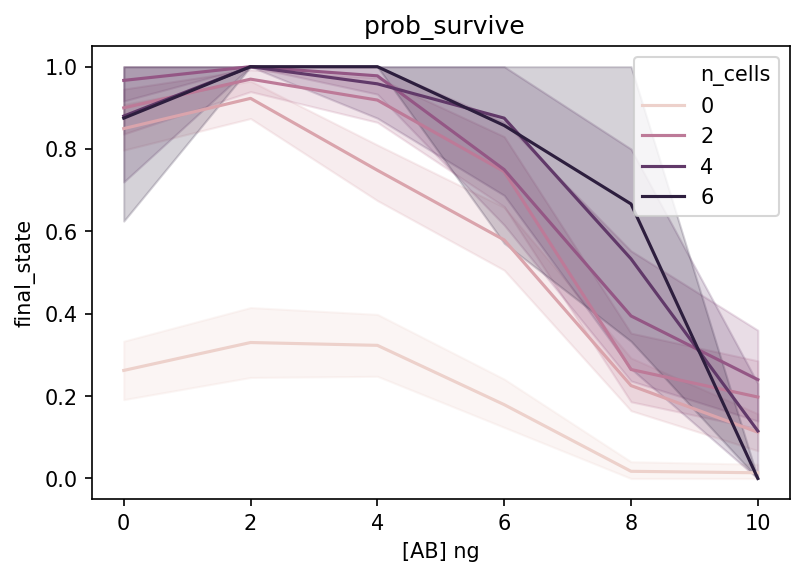

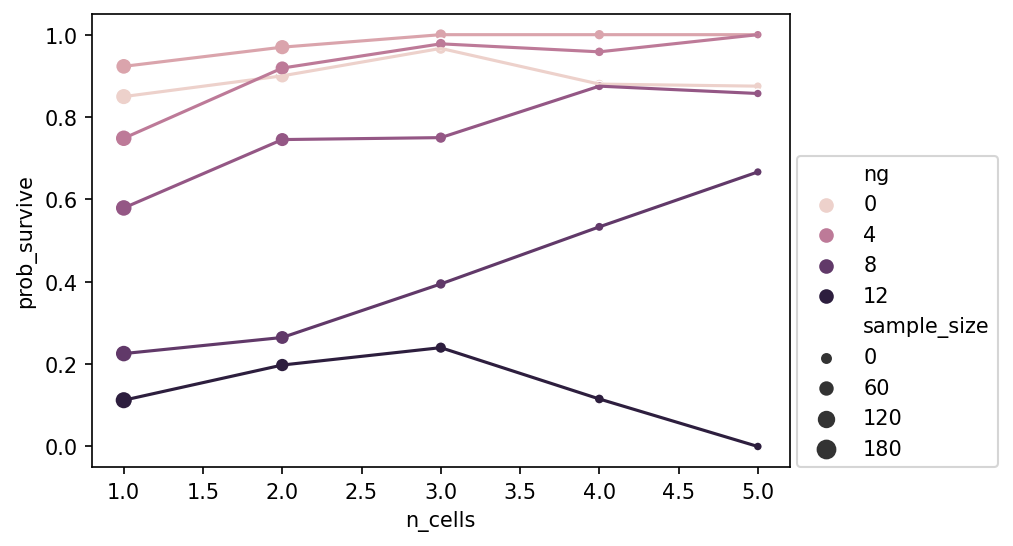

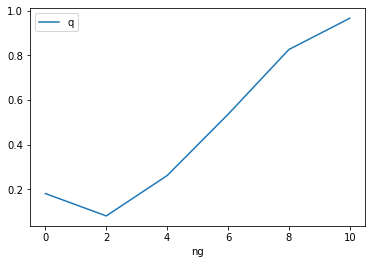

In [117]:
prob = get_mse()

In [119]:
prob.to_csv('/home/aaristov/Anchor/Lena/Data/20210623-MIC-24h-5x/prob.csv', index=None)

In [27]:
isorted = intensities.query('ng == 0').sort_values('mean_intensity', ignore_index=True)
thr = isorted.loc[117].mean_intensity
thr

416.23974609375

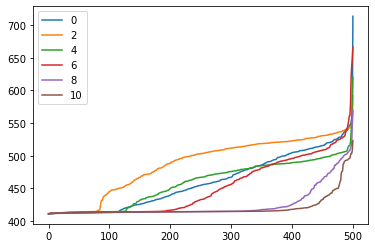

In [28]:
[intensities.query(f'ng == {c}').sort_values('mean_intensity', ignore_index=True).mean_intensity.plot(label=c) for c in range(0, 12,2)]
# plt.ylim(400, 450)
plt.legend()

array([[<AxesSubplot:title={'center':'mean_intensity'}>]], dtype=object)

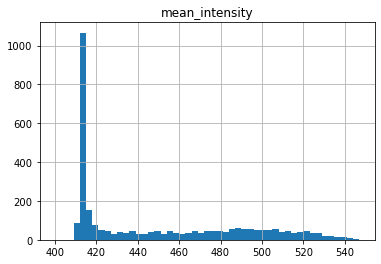

In [29]:
intensities.hist('mean_intensity', bins=np.arange(400,550, 3))